# Sales Channel Prediction 

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("advertise.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=data.drop("Unnamed: 0",axis=1)

Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [30]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [31]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [32]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

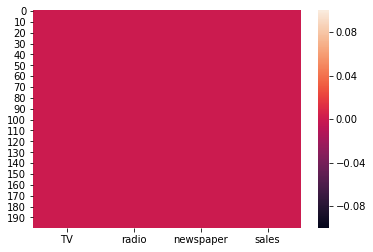

In [8]:
sns.heatmap(data.isnull())

In [9]:
data.shape

(200, 4)

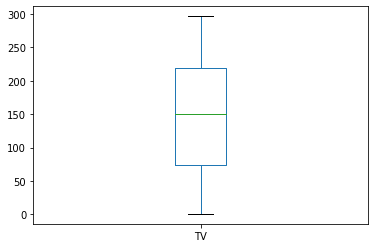

In [34]:
#Checking the outliers
data["TV"].plot.box()

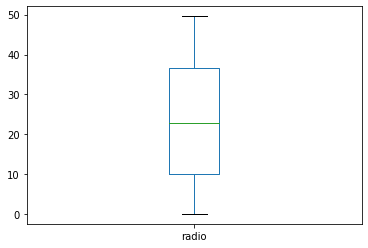

In [35]:
data['radio'].plot.box()

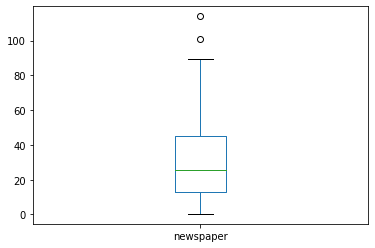

In [36]:
data['newspaper'].plot.box()

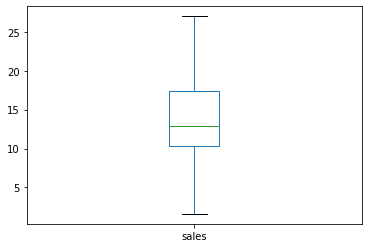

In [37]:
data['sales'].plot.box()

EDA

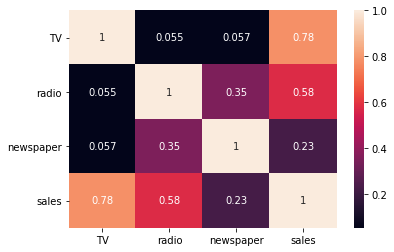

In [39]:
sns.heatmap(data.corr(),annot=True)

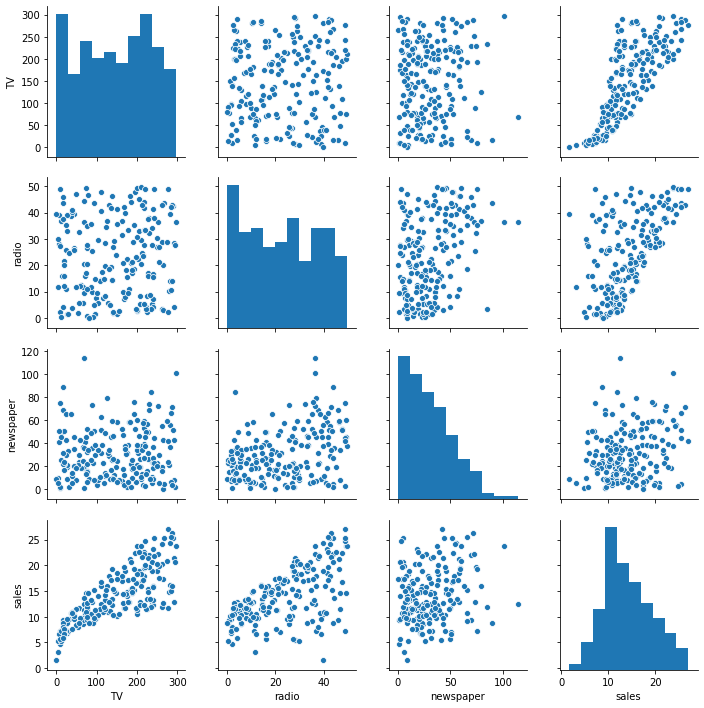

In [10]:
sns.pairplot(data)

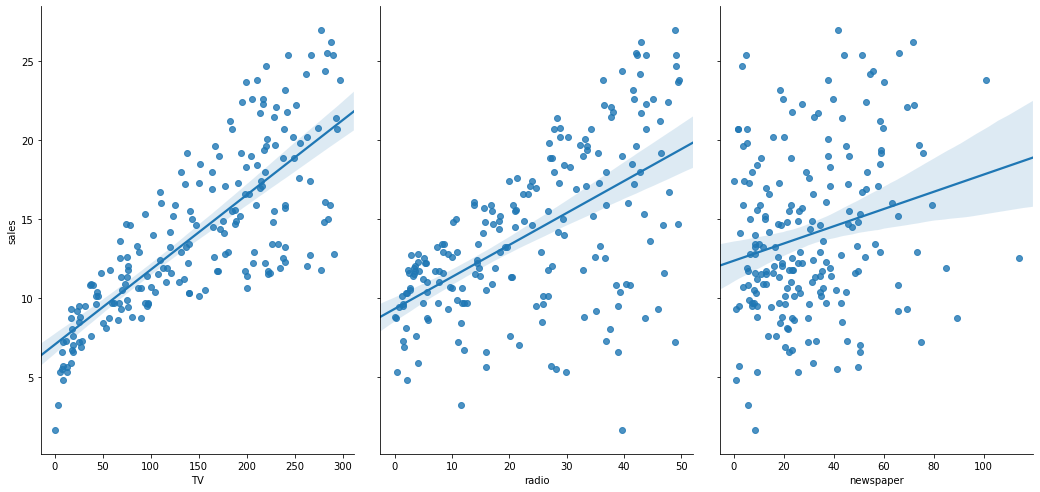

In [43]:
sns.pairplot(data,x_vars=["TV","radio","newspaper"], y_vars="sales",kind="reg",size=7,aspect=0.7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3B88F26D8>,
      dtype=object)

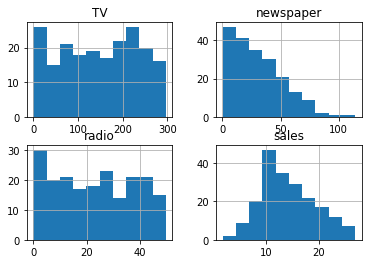

In [44]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3B8930E48>,
      dtype=object)

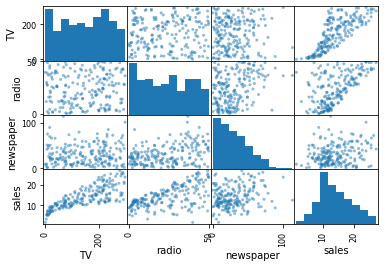

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

SPLITTING DATA INTO X AND Y

In [11]:
x=data.drop("sales",axis=1)
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y=data["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [47]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,'is',max_r_score)

max r2 score corresponding to 13 is 0.9329679186406996


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=71)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(42, 3)
(158,)
(42,)


In [64]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='r2'
# Spot Check Algorithms
models = []
models.append(('lm', LinearRegression()))
models.append(('knn', KNeighborsRegressor()))
models.append(('dtc', DecisionTreeRegressor()))
models.append(('rfc', RandomForestRegressor()))
models.append(('lasso', Lasso()))
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=0)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lm: 0.860007 (0.084261)
knn: 0.904576 (0.029107)
dtc: 0.937515 (0.021650)
rfc: 0.968345 (0.012556)
lasso: 0.861587 (0.078573)


In [73]:
#pipeline with preprocessing and model
pipeline=make_pipeline(preprocessing.MinMaxScaler(),RandomForestRegressor(n_estimators=100))
#Appling Hyperparameters
pipeline.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('randomforestregressor',
   RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                         max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
       

In [76]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [77]:
clf=GridSearchCV(pipeline,hyperparameters,cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              m

In [78]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}


In [79]:
print(clf.refit)

True


In [82]:
#pedicting the data
y_pred=clf.predict(x_test)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9807851578063298
0.480539300000002


In [83]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(clf,"Sales.pkl")

['Sales.pkl']